## PROJECT 1 : Predicting Credit Card Approvals

### OBJECTIVE : Credit card applications

## SUMMARY

#### <a href="#forme"> 1-Inspecting the data and Data preprocessing </a>
#### <a href="#fond"> 2- Model Creation </a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [55]:
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_columns',None)

### <a id="forme">  1-Inspecting the data and Data preprocessing </a>

In [56]:
cc_apps = pd.read_csv("crx.data",header=None)
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [57]:
cc_apps_info = cc_apps.info()
print(cc_apps_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


In [58]:
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


In [59]:
cc_apps.tail(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [60]:
cc_apps[cc_apps.isna()].head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Splitting the dataset into train and test sets

In [61]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop([11,13],axis=1)

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

##### Handling the missing values (part i)

In [62]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace('?',np.NAN)
cc_apps_test = cc_apps_test.replace('?',np.NAN)

##### Handling the missing values (part ii)

In [63]:
# Impute the missing values with mean imputation
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_test.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isna().sum())
print(cc_apps_test.isna().sum())

0     8
1     5
2     0
3     6
4     6
5     7
6     7
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     4
1     7
2     0
3     0
4     0
5     2
6     2
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


##### Handling the missing values (part iii)

In [64]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns :
    # Check if the column is of object type
    if cc_apps_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_test[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps_train.isna().sum())
print(cc_apps_test.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


#### Preprocessing the data (part i)

In [65]:
# Convert the categorical features in the train and test sets independently
cc_apps_train =pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)

#### Preprocessing the data (part ii)

In [66]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = cc_apps_train.iloc[:,0:-2].values, cc_apps_train.iloc[:,-1].values
X_test, y_test = cc_apps_test.iloc[:,0:-2].values, cc_apps_test.iloc[:,-1].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

### <a id="fond">  2- Model Creation </a>

#### Fitting a logistic regression model to the train set

In [67]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train ,y_train)

LogisticRegression()

#### Making predictions and evaluating performance

Accuracy of logistic regression classifier:  0.8508771929824561


<AxesSubplot:>

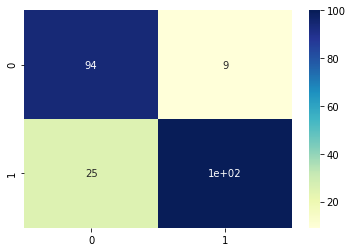

In [68]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
matrix_confu=confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(matrix_confu,annot=True,cmap='YlGnBu')

#### Grid searching and making the model perform better

In [69]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol,max_iter=max_iter)

#### Finding the best performing model

In [70]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train ,y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ",grid_model_result.best_estimator_.score(rescaledX_test,y_test))

Best: 0.867882 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8508771929824561
